In [75]:
import pandas as pd

# Q1
# a) Read the csv file (Bank.csv in Canvas) as Pandas DataFrame

url = 'https://github.com/lc0312/COSC502/blob/main/Bank.csv?raw=true'
bank_df = pd.read_csv(url)

In [76]:
# b) Consider the ‘Personal Loan’ as class (Y) variable and all other columns (Ignore the ID and Zipcode columns) as X variable.

Y_data = bank_df['Personal Loan']
X_data = bank_df.drop(['ID','ZIP Code','Personal Loan'], axis=1)

In [77]:
# c) Create a training (70%) and test set (30%) from the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

In [78]:
# d) Classify the above dataset by using the K-NN algorithms and compare the performances (using both the Euclidean and Manhattan distance measures).
from sklearn.neighbors import KNeighborsClassifier

knn_M = KNeighborsClassifier(p=1)
knn_M.fit (X_train, Y_train)

print ('Manhattan:', knn_M.score (X_test, Y_test))

knn_E = KNeighborsClassifier(p=2)
knn_E.fit (X_train, Y_train)

print ('Euclidean:', knn_E.score (X_test, Y_test))

Manhattan: 0.9166666666666666
Euclidean: 0.908


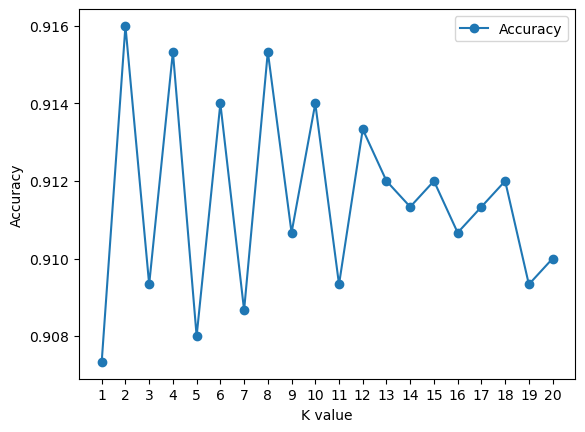

In [79]:
# e) For K-NN classification, fit and test the model for different values for K (from 1 to 20) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).
import matplotlib.pyplot as plt
import numpy as np

scores_knn = []
x_number = np.arange (1,21,1)

for n_number in range (20):
    knn = KNeighborsClassifier(n_neighbors=n_number+1)
    knn.fit (X_train, Y_train)
    scores_knn.append (knn.score(X_test, Y_test))

y_number = np.array (scores_knn)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('K value')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()

Accuracy and F1 score: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1407
           1       0.34      0.49      0.40        93

    accuracy                           0.91      1500
   macro avg       0.65      0.71      0.68      1500
weighted avg       0.93      0.91      0.92      1500

Confuison matrix: 
 [[1316   91]
 [  47   46]] 

Compare with hw4:


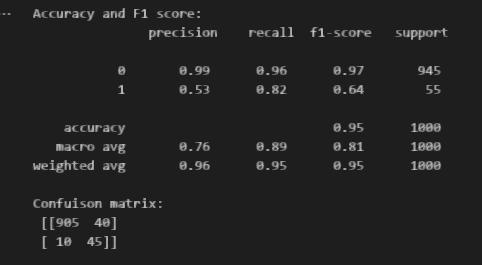

In [80]:
# f) Compare the performances (test accuracies and confusion matrices) of Logistic Regression (in HW4) and KNN classifiers and show the result.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Accuracy and F1 score: \n', classification_report (knn_E.predict(X_test), Y_test))

print ('Confuison matrix: \n', confusion_matrix (knn_E.predict(X_test), Y_test),'\n')

print ('Compare with hw4:')
from IPython import display
display.Image('D:\hw4_score.png')

In [81]:
#Q2
# a) Read the data set as Pandas Dataframe object and consider the columns: Gender, Married, Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area as feature input (X) and Loan_Status as Label output (Y)
url = 'https://github.com/lc0312/COSC502/blob/main/Customer.csv?raw=true'
Customer_df = pd.read_csv(url)

output_data = Customer_df['Loan_Status']
input_data = Customer_df[['Gender', 'Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [82]:
# b) Perform the necessary conversion (Label encoding and may be feature scaling) of appropriate features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ('Gender', 'Married', 'Education', 'Property_Area'):
    input_data[col] = le.fit_transform(input_data[col])

print ('For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet') 

input_data = input_data.fillna(method="ffill")

For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet


C:\Users\try\AppData\Local\Temp\ipykernel_10448\1745711345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
C:\Users\try\AppData\Local\Temp\ipykernel_10448\1745711345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
C:\Users\try\AppData\Local\Temp\ipykernel_10448\1745711345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [83]:
# c) Classify the data set (20% test, 80% training) using Decision Tree and Random Forest classifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split (input_data, output_data, test_size=0.2)

dt = tree.DecisionTreeClassifier()
dt.fit (X_train, Y_train)


rf = RandomForestClassifier(max_depth=1)
rf.fit(input_data, output_data)


RandomForestClassifier(max_depth=1)

Decision Tree


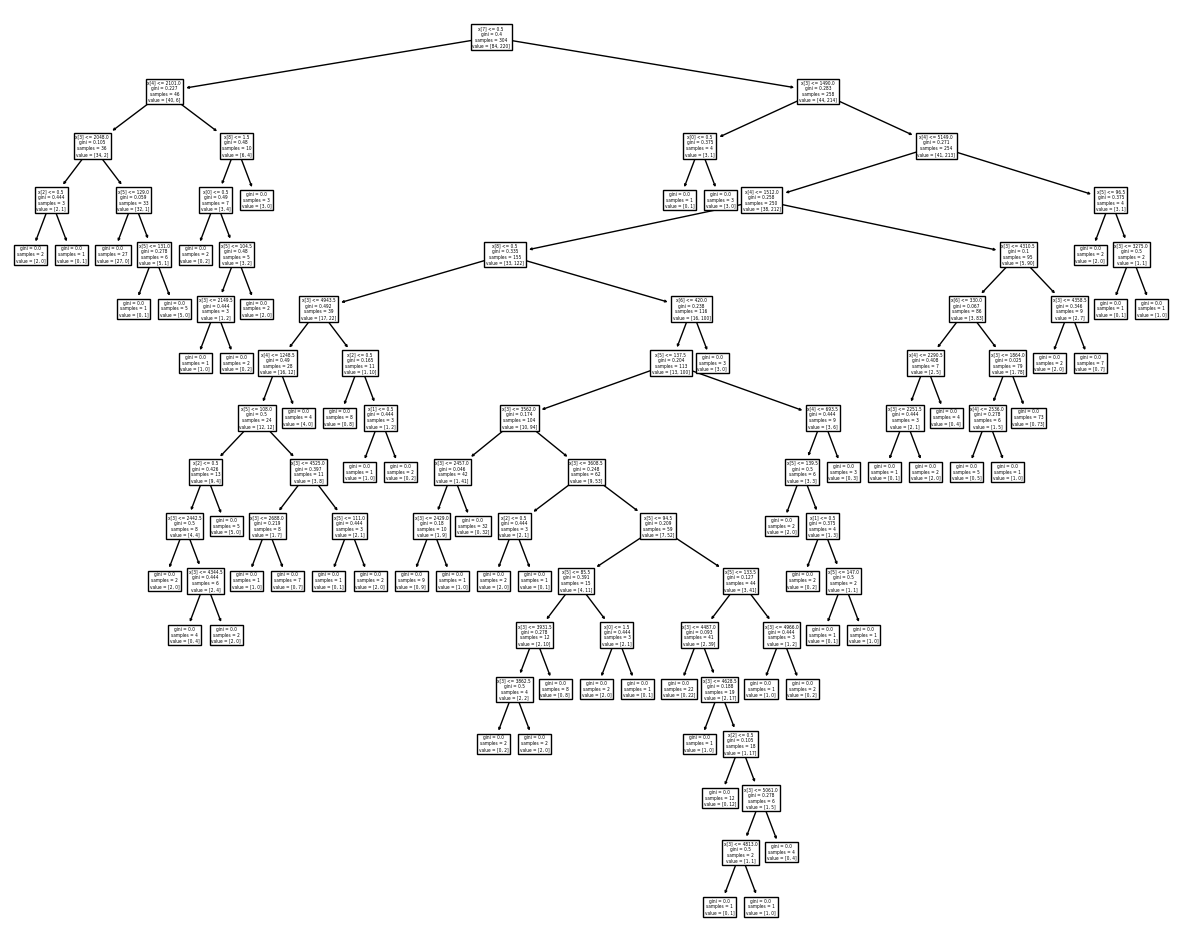

First tree


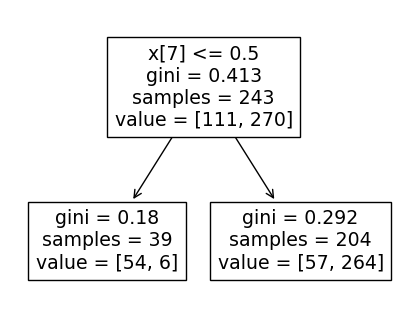

Last two


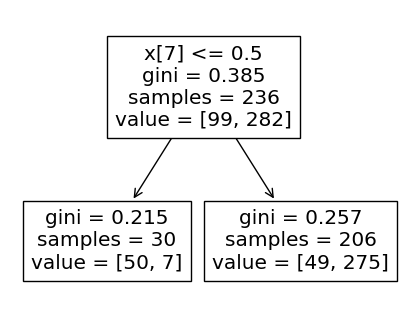

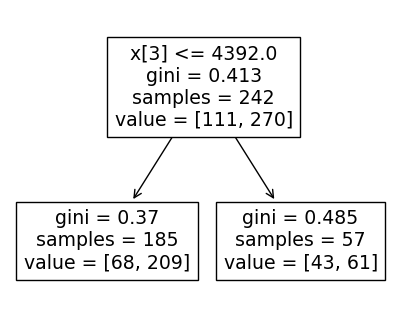

In [84]:
# d) For the Decision Tree algorithm generate the tree and show/save it as an image file. Show the first and last two decision trees generated by your Random Forest classifier.
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,12))
print ('Decision Tree')
tree.plot_tree(dt)
plt.show()
#fig.savefig('tree.png',format='png')

plt.figure(figsize=(5,4))
print ('First tree')
plot_tree(rf.estimators_[0])
plt.show()

print ('Last two')
plt.figure(figsize=(5,4))
plot_tree(rf.estimators_[98])
plt.show()

plt.figure(figsize=(5,4))
plot_tree(rf.estimators_[99])
plt.show()

In [85]:
# e) Show the accuracies and confusion matrices for each of the above classifier for the test set.

print ('For Decision Tree')
print ('Accuracy and F1 score: \n', classification_report (dt.predict(X_test), Y_test))
print ('Confuison matrix: \n', confusion_matrix (dt.predict(X_test), Y_test),'\n')

print ('For Random Forest')
print ('Accuracy and F1 score: \n', classification_report (rf.predict(X_test), Y_test))
print ('Confuison matrix: \n', confusion_matrix (rf.predict(X_test), Y_test),'\n')

For Decision Tree
Accuracy and F1 score: 
               precision    recall  f1-score   support

           N       0.62      0.62      0.62        26
           Y       0.80      0.80      0.80        51

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77

Confuison matrix: 
 [[16 10]
 [10 41]] 

For Random Forest
Accuracy and F1 score: 
               precision    recall  f1-score   support

           N       0.19      1.00      0.32         5
           Y       1.00      0.71      0.83        72

    accuracy                           0.73        77
   macro avg       0.60      0.85      0.58        77
weighted avg       0.95      0.73      0.80        77

Confuison matrix: 
 [[ 5  0]
 [21 51]] 



In [86]:
# Q3
url = url = 'https://github.com/lc0312/COSC502/blob/main/Housing.csv?raw=true'
house_df = pd.read_csv(url)
house_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
# a) Perform a K-means Clustering with default values in the above dataset by considering the price, area, stories, basement and parking features only
from sklearn.cluster import KMeans

house_df ['basement'] = le.fit_transform(house_df['basement'])
kmean_data = house_df[['price', 'area','stories','basement', 'parking']]
kmeans = KMeans().fit(kmean_data)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [88]:
# b) Show/Print the cluster membership of the first 100 samples and feature of the centroids (cluster center)

cm_100 = kmeans.fit_predict(kmean_data[0:101])
print ('cluster membership:', cm_100)

print ('feature of the centroids:')
kmeans.cluster_centers_

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster membership: [2 2 2 2 7 7 3 3 3 3 3 3 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4
 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
feature of the centroids:


array([[8.50715385e+06, 6.70038462e+03, 2.23076923e+00, 6.15384615e-01,
        1.46153846e+00],
       [6.56016667e+06, 6.55527778e+03, 2.22222222e+00, 4.72222222e-01,
        8.61111111e-01],
       [1.25037500e+07, 8.46000000e+03, 2.75000000e+00, 5.00000000e-01,
        2.50000000e+00],
       [9.90850000e+06, 9.63833333e+03, 2.66666667e+00, 5.00000000e-01,
        1.50000000e+00],
       [7.94558545e+06, 6.69745455e+03, 3.36363636e+00, 2.72727273e-01,
        1.27272727e+00],
       [7.31300000e+06, 6.95380952e+03, 2.90476190e+00, 1.90476190e-01,
        1.09523810e+00],
       [9.08687500e+06, 6.24625000e+03, 2.25000000e+00, 2.50000000e-01,
        1.37500000e+00],
       [1.11300000e+07, 7.46000000e+03, 1.50000000e+00, 1.00000000e+00,
        2.00000000e+00]])

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

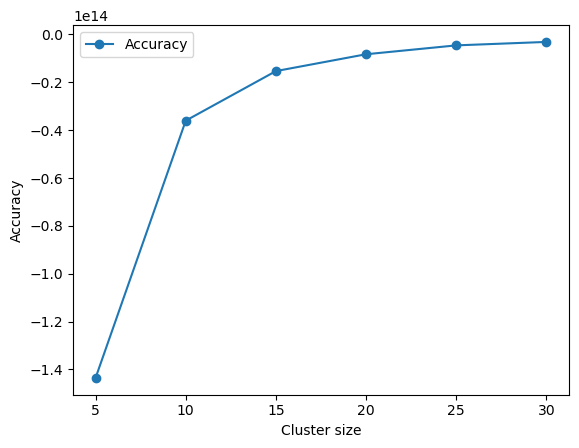

In [89]:
# c) Plot the accuracy (Elbow method) of different cluster sizes (5, 10, 15, 20, 25, 30) and determine the best cluster size

scores_kmean = []
x_number = np.arange (5,31,5)

for n_number in range (6):
    kmeans = KMeans(n_clusters=5*(n_number+1)).fit(kmean_data)
    cluster_labels = kmeans.labels_
    scores_kmean.append (kmeans.score(kmean_data, cluster_labels))

y_number = np.array (scores_kmean)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('Cluster size')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


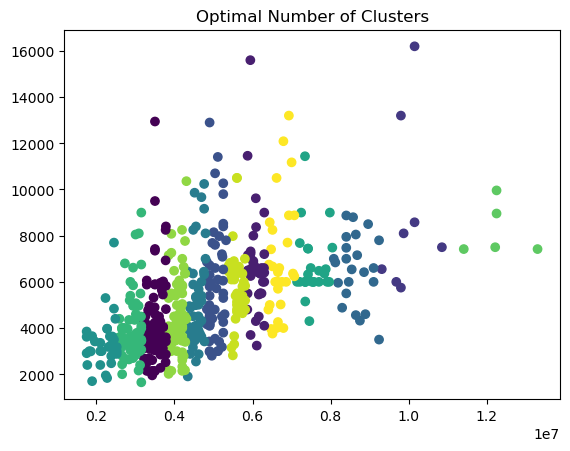

In [90]:
# d) Plot (Scatter) the result (based on price and area) with final cluster numbers (chosen from elbow method) and show the cluster memberships with different colors

y_pred = KMeans(n_clusters=13).fit_predict(kmean_data) # I pick 13 as Elbow point
plt.scatter(kmean_data['price'], kmean_data['area'], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()
